In [136]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [101]:
wine = datasets.load_wine()
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [102]:
np.unique(wine.target)

array([0, 1, 2])

In [103]:
wine.feature_names, wine.target_names

(['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'],
 array(['class_0', 'class_1', 'class_2'], dtype='<U7'))

In [104]:
X, y = wine.data, wine.target
# X = X.reshape(-1, 1)
X.shape, y.shape

((178, 13), (178,))

In [105]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)

In [106]:
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.fit_transform(X_test)

In [107]:
ex = np.array([0, 1, 2, 3, 4, 5])
print("standardized:", (ex - ex.mean()) / ex.std())
print("normalized:", (ex - ex.min()) / (ex.max() - ex.min()))

standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
normalized: [0.  0.2 0.4 0.6 0.8 1. ]


In [108]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [109]:
lr = LogisticRegression(penalty="l1", C=1.0, solver="liblinear", multi_class="ovr")
lr.fit(X_train_std, y_train)
print("Training accuracy:", lr.score(X_train_std, y_train))
print("Test accuracy:", lr.score(X_test_std, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


In [110]:
lr.intercept_

array([-1.26351416, -1.21589109, -2.37066741])

In [111]:
lr.coef_

array([[ 1.24570245,  0.18011595,  0.74552976, -1.16306787,  0.        ,
         0.        ,  1.16001974,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55655488,  2.50901438],
       [-1.53655865, -0.3876473 , -0.99529759,  0.36507778, -0.0596322 ,
         0.        ,  0.66855865,  0.        ,  0.        , -1.93427178,
         1.23328874,  0.        , -2.23232679],
       [ 0.13548641,  0.16859   ,  0.35719213,  0.        ,  0.        ,
         0.        , -2.43775155,  0.        ,  0.        ,  1.56360771,
        -0.81840609, -0.49340577,  0.        ]])

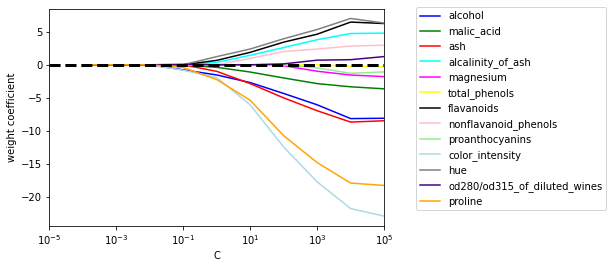

In [82]:
fig = plt.figure()
ax = plt.subplot(111)

colors = "blue green red cyan magenta yellow black pink lightgreen lightblue gray indigo orange".split(
    " "
)
weights, params = [], []
for c in np.arange(-4.0, 6.0):
    lr = LogisticRegression(
        penalty="l1", C=10.0 ** c, solver="liblinear", multi_class="ovr", random_state=0
    )
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10 ** c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label=wine.feature_names[column], color=color)

plt.axhline(0, color="black", linestyle="--", linewidth=3)
plt.xlim([10 ** -5, 10 ** 5])
plt.ylabel("weight coefficient")
plt.xlabel("C")
plt.xscale("log")
plt.legend(loc="upper left")
ax.legend(loc="upper center", bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()

In [86]:
%run sequential_backward_selection.py

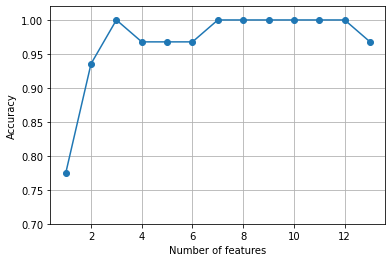

In [88]:
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker="o")
plt.ylim([0.7, 1.02])
plt.ylabel("Accuracy")
plt.xlabel("Number of features")
plt.grid()
plt.show()

In [98]:
k3 = list(sbs.subsets_[10])
print(np.array(wine.feature_names)[k3])

['alcohol' 'malic_acid' 'od280/od315_of_diluted_wines']


In [96]:
knn.fit(X_train_std, y_train)
print("Training accuracy:", knn.score(X_train_std, y_train))
print("Test accuracy:", knn.score(X_test_std, y_test))

Training accuracy: 0.967741935483871
Test accuracy: 0.9814814814814815


In [114]:
knn.fit(X_train_std[:, k3], y_train)
print("Training accuracy:", knn.score(X_train_std[:, k3], y_train))
print("Test accuracy:", knn.score(X_test_std[:, k3], y_test))

Training accuracy: 0.9516129032258065
Test accuracy: 0.9259259259259259


In [116]:
feat_labels = wine.feature_names
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train_std, y_train)
importances = forest.feature_importances_
importances

array([0.11852942, 0.02564836, 0.01327854, 0.02236594, 0.03135708,
       0.05087243, 0.17475098, 0.01335393, 0.02556988, 0.1439199 ,
       0.058739  , 0.13616194, 0.1854526 ])

In [117]:
indices = np.argsort(importances)[::-1]
indices

array([12,  6,  9, 11,  0, 10,  5,  4,  1,  8,  3,  7,  2])

In [132]:
for f in range(X_train.shape[1]):
    print(f"{f+1:2d}) {feat_labels[indices[f]]:<30} {importances[indices[f]]:f}")

 1) proline                        0.185453
 2) flavanoids                     0.174751
 3) color_intensity                0.143920
 4) od280/od315_of_diluted_wines   0.136162
 5) alcohol                        0.118529
 6) hue                            0.058739
 7) total_phenols                  0.050872
 8) magnesium                      0.031357
 9) malic_acid                     0.025648
10) proanthocyanins                0.025570
11) alcalinity_of_ash              0.022366
12) nonflavanoid_phenols           0.013354
13) ash                            0.013279


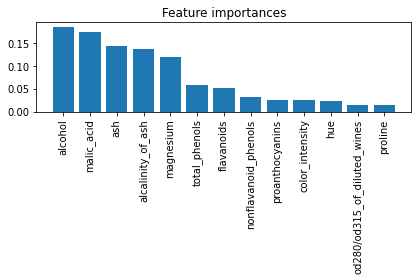

In [135]:
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [138]:
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of samples that meet this criterion:', X_selected.shape[0])

for f in range(X_selected.shape[1]):
    print(f'{f+1:2d}) {feat_labels[indices[f]]:<30} {importances[indices[f]]}')

Number of samples that meet this criterion: 124
 1) proline                        0.18545260453273973
 2) flavanoids                     0.17475097557788732
 3) color_intensity                0.14391990337231414
 4) od280/od315_of_diluted_wines   0.1361619442214559
 5) alcohol                        0.11852941731789315
